
Assignment 2

Cluster your data:
Use at least two methods to cluster your data. (25 points)
Answer the following questions for the clustering:

* Do the clustering methods generate the same clusters?
* Does scaling effect the clustering?  
* Does the clustering produce interesting groupings?  

Generate a linear model for your data:
Find a significant linear relation of your choosing in your data. Create a multivariate linear model. (50 points)
Answer the following questions for the multivariate linear model:

* Is the relationship significant?   
* Are any model assumptions violated?   
* Is there any multi-colinearity in the model?   
* In the multiple regression models are predictor variables independent of all the other predictor variables?   
* In in multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model.   
* Does the model make sense?  
* Cross-validate the model. How well did it do?      
* Does regularization help with creating models that validate better on out of sample data?   

Generate a logistic model for your data:

Find a significant logistic linear model of your choosing in your data. Create a logistic linear model. (25 points)
Answer the following questions for the logistic linear model:

* Is the relationship significant?  
* Are any model assumptions violated?   
* Cross-validate the model. How well did it do?

# 1.Clustering

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 9)

%matplotlib inline
from collections import Counter
import random
from sklearn.cluster import KMeans, DBSCAN
from scipy.stats import multivariate_normal

#import the data det

In [2]:
s = pd.read_csv('ShanghaiPM20100101_20151231_Training - Training.csv')

In [3]:
s.head()

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,date,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,-6.0,59.48,1026.1,1.0,cv,1.0,2010-1-1-0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,-6.0,59.48,1025.1,1.0,SE,2.0,2010-1-1-1,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,-7.0,59.21,1025.1,0.0,SE,4.0,2010-1-1-2,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,-6.0,63.94,1024.0,0.0,SE,5.0,2010-1-1-3,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,-6.0,63.94,1023.0,0.0,SE,8.0,2010-1-1-4,0.0


In [4]:
shanghai = s.dropna()
shanghai.head()

#clean data, drop NAs

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,date,Iprec
4303,26305,2013,1,1,0,4,66.0,70.0,71.0,-5.0,69.00,1023.0,0.0,SW,60.0,2013-1-1-0,0.0
4304,26306,2013,1,1,1,4,67.0,76.0,72.0,-5.0,69.00,1023.0,0.0,SW,62.0,2013-1-1-1,0.0
4306,26308,2013,1,1,3,4,73.0,78.0,74.0,-4.0,74.41,1023.0,0.0,SW,65.0,2013-1-1-3,0.0
4307,26309,2013,1,1,4,4,75.0,77.0,77.0,-4.0,80.04,1023.0,-1.0,SW,68.0,2013-1-1-4,0.0
4308,26310,2013,1,1,5,4,73.0,78.0,80.0,-4.0,80.04,1023.0,-1.0,SW,70.0,2013-1-1-5,0.0


In [5]:
# sns.pairplot(shanghai, hue="season")
# plt.show()

def set_colors(labels, colors='rgbykcmw'):
    colored_labels = []
    for label in labels:
        if (label < 0) or (label > 6):
          colored_labels.append(colors[7]) 
        else:
          colored_labels.append(colors[label])
    return colored_labels

# DBSCAN

Counter({-1: 1683, 2: 319, 12: 142, 1: 99, 7: 92, 24: 88, 21: 85, 11: 82, 20: 48, 27: 48, 0: 46, 18: 44, 17: 39, 32: 36, 13: 33, 6: 32, 3: 25, 10: 25, 8: 23, 14: 23, 37: 22, 5: 22, 25: 21, 15: 19, 52: 19, 33: 18, 23: 18, 9: 17, 30: 16, 39: 16, 48: 16, 42: 15, 40: 14, 4: 14, 36: 14, 53: 14, 29: 13, 34: 13, 43: 13, 16: 12, 31: 12, 46: 12, 41: 11, 38: 11, 35: 11, 28: 11, 55: 11, 47: 11, 54: 10, 45: 10, 44: 10, 22: 10, 26: 10, 50: 10, 51: 10, 56: 9, 49: 7, 19: 5})


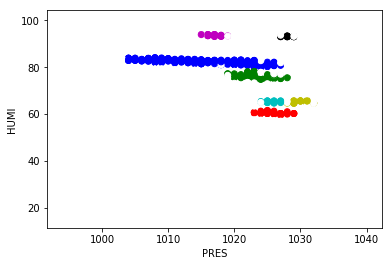

In [6]:

# Fit a DBSCAN estimator
estimator = DBSCAN(eps=1, min_samples=10)
df2 = pd.DataFrame(shanghai, columns=["PRES", "HUMI"])
X = df2[["PRES", "HUMI"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(df2['PRES'], df2['HUMI'], c=colors)
plt.xlabel("PRES")
plt.ylabel("HUMI")
plt.show()


Counter({0: 1991, -1: 391, 1: 354, 2: 343, 6: 102, 8: 93, 5: 32, 11: 31, 9: 29, 3: 25, 7: 15, 18: 14, 4: 12, 13: 12, 19: 11, 10: 11, 15: 10, 16: 10, 12: 10, 17: 9, 14: 7, 20: 7})


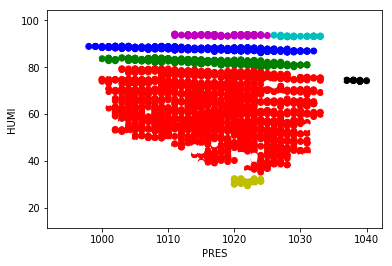

In [7]:

# Fit a DBSCAN estimator

estimator = DBSCAN(eps=1.5, min_samples=10)
df2 = pd.DataFrame(shanghai, columns=["PRES", "HUMI"])
X = df2[["PRES", "HUMI"]]
estimator.fit(X)

# Clusters are given in the labels_ attribute

labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(df2['PRES'], df2['HUMI'], c=colors)
plt.xlabel("PRES")
plt.ylabel("HUMI")
plt.show()

Counter({0: 2618, 1: 343, -1: 245, 4: 195, 3: 32, 7: 15, 2: 14, 5: 14, 9: 13, 6: 11, 8: 10, 10: 9})


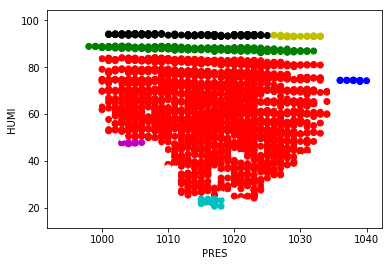

In [8]:

# Fit a DBSCAN estimator

estimator = DBSCAN(eps=2, min_samples=10)
df2 = pd.DataFrame(shanghai, columns=["PRES", "HUMI"])
X = df2[["PRES", "HUMI"]]
estimator.fit(X)

# Clusters are given in the labels_ attribute

labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(df2['PRES'], df2['HUMI'], c=colors)
plt.xlabel("PRES")
plt.ylabel("HUMI")
plt.show()

# k-means

In [9]:

# Fit a k-means estimator

estimator = KMeans(n_clusters=2)
X = shanghai[["PRES", "HUMI"]]
estimator.fit(X)

# Clusters are given in the labels_ attribute

labels = estimator.labels_
print (labels)

[0 0 0 ... 0 0 0]


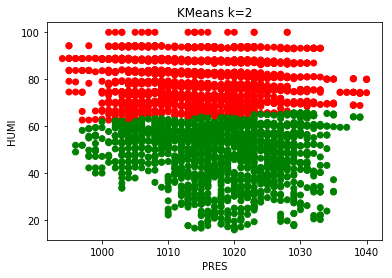

In [10]:
colors = set_colors(labels)
plt.scatter(shanghai['PRES'], shanghai['HUMI'], c=colors)
plt.title("KMeans k=2")
plt.xlabel("PRES")
plt.ylabel("HUMI")
plt.show()

Counter({1: 1490, 0: 1310, 2: 719})


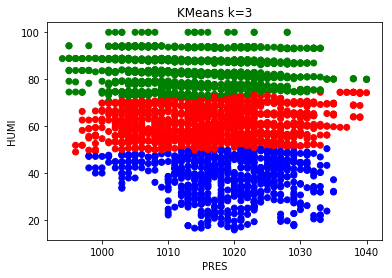

In [11]:
estimator = KMeans(n_clusters=3)
X = shanghai[["PRES", "HUMI"]]
estimator.fit(X)

# Clusters are given in the labels_ attribute

labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(shanghai['PRES'], shanghai['HUMI'], c=colors)
plt.title("KMeans k=3")
plt.xlabel("PRES")
plt.ylabel("HUMI")
plt.show()

Counter({2: 1111, 1: 1087, 0: 717, 3: 604})


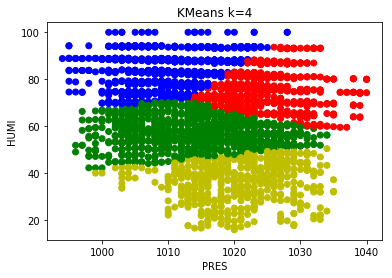

In [12]:
estimator = KMeans(n_clusters=4)
X = shanghai[["PRES", "HUMI"]]
estimator.fit(X)

# Clusters are given in the labels_ attribute

labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(shanghai['PRES'], shanghai['HUMI'], c=colors)
plt.title("KMeans k=4")
plt.xlabel("PRES")
plt.ylabel("HUMI")
plt.show()

Counter({3: 776, 4: 755, 2: 746, 1: 727, 0: 515})


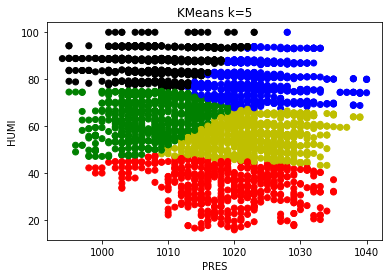

In [13]:
estimator = KMeans(n_clusters=5)
X = shanghai[["PRES", "HUMI"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(shanghai['PRES'], shanghai['HUMI'], c=colors)
plt.title("KMeans k=5")
plt.xlabel("PRES")
plt.ylabel("HUMI")
plt.show()

Counter({1: 678, 2: 660, 0: 657, 3: 611, 5: 470, 4: 443})


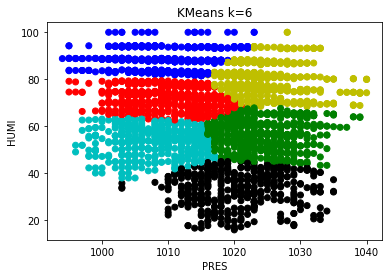

In [14]:
estimator = KMeans(n_clusters=6)
X = shanghai[["PRES", "HUMI"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(shanghai['PRES'], shanghai['HUMI'], c=colors)
plt.title("KMeans k=6")
plt.xlabel("PRES")
plt.ylabel("HUMI")
plt.show()

# Answer Questions:

# Do the clustering methods generate the same clusters?
No, not really, the DBSCAN generate points that are very close, and kmeans method just generate parts in certain areas. According to different parameters, the result will vary.

# Does scaling effect the clustering?
Yes, we can see from the charts that clustering changes when we put in different parameters.

# Does the clustering produce interesting groupings?
Not very interesting grouping, the reason to this is the characteristic of the dateset - its weather related, and full of randomness. 

#  
# 2. Linear Modeling

In [15]:
from __future__ import print_function
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
import pandas.tseries
warnings.filterwarnings('ignore')

# Load the data again into a pandas dataframe
df = shanghai
df.head()
#df.describe()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,date,Iprec
4303,26305,2013,1,1,0,4,66.0,70.0,71.0,-5.0,69.00,1023.0,0.0,SW,60.0,2013-1-1-0,0.0
4304,26306,2013,1,1,1,4,67.0,76.0,72.0,-5.0,69.00,1023.0,0.0,SW,62.0,2013-1-1-1,0.0
4306,26308,2013,1,1,3,4,73.0,78.0,74.0,-4.0,74.41,1023.0,0.0,SW,65.0,2013-1-1-3,0.0
4307,26309,2013,1,1,4,4,75.0,77.0,77.0,-4.0,80.04,1023.0,-1.0,SW,68.0,2013-1-1-4,0.0
4308,26310,2013,1,1,5,4,73.0,78.0,80.0,-4.0,80.04,1023.0,-1.0,SW,70.0,2013-1-1-5,0.0


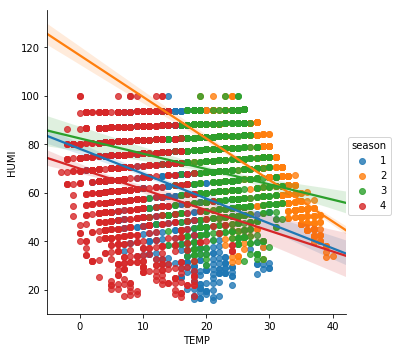

In [16]:
sns.lmplot(x="TEMP", y="HUMI", data=df,  hue="season")
plt.show()

#we having all seasons liner regression towords same direction, which indicate its not a coincident.


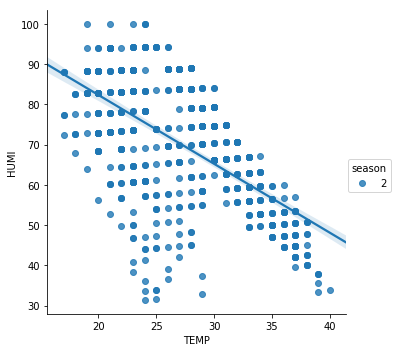

In [17]:
#take season 2(summer)as an example

df2 = df[(df.season == 2)]
sns.lmplot(x="TEMP", y="HUMI", data=df2,  hue="season")
plt.show()

In [18]:
# from sklearn import linear_model

X = df2[["TEMP"]]
y = df2[["HUMI"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

[116.55818871] [[-1.71160764]]


# forecast for relationship of shanghai jingan temp and humid is: 

## humid = 116.558 - 1.7116*tempertrue

In [19]:
# import statsmodels.api as sm
# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   HUMI   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     5186.
Date:                Fri, 23 Feb 2018   Prob (F-statistic):               0.00
Time:                        13:37:44   Log-Likelihood:                -3605.3
No. Observations:                 773   AIC:                             7213.
Df Residuals:                     772   BIC:                             7217.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TEMP           2.3811      0.033     72.011      0.000       2.316       2.446
==============================================================================
Omnibus:                       71.892   Durbin-Watson:                   0.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.030
Skew:                          -0.316   Prob(JB):                     6.72e-08
Kurtosis:                       2.209   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

#we can see the fit is good, at 87%

Parameters:  TEMP    2.381082
dtype: float64
R2:  0.8704166556864551


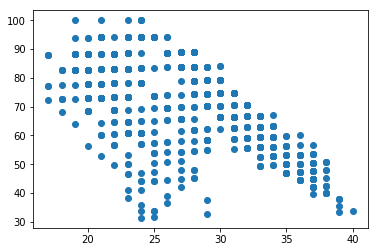

In [21]:
X = df2[["TEMP"]]
y = df2[["HUMI"]]
plt.plot(X, y, "o")

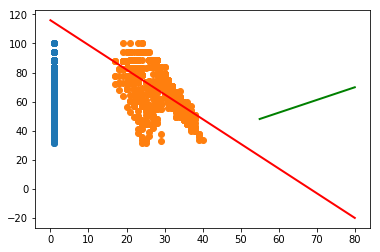

In [22]:
X = sm.add_constant(X) #  Our model needs an intercept so we add a column of 1s:
plt.plot(X, y, "o")
x2 = np.linspace(0, 80, 55)
y2 = 116 + (-1.7*x2)
plt.plot(x2, y2, lw=2, color="r")
x2 = np.linspace(55, 80, 33)
y2 = (0.873575*x2)
plt.plot(x2, y2, lw=2, color="g")
plt.show()

In [23]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   HUMI   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     465.7
Date:                Fri, 23 Feb 2018   Prob (F-statistic):           3.66e-81
Time:                        13:37:44   Log-Likelihood:                -3016.4
No. Observations:                 773   AIC:                             6037.
Df Residuals:                     771   BIC:                             6046.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        116.5582      2.216     52.607      0.000     112.209     120.908
TEMP          -1.7116      0.079    -21.580      0.000      -1.867      -1.556
==============================================================================
Omnibus:                       55.864   Durbin-Watson:                   0.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.308
Skew:                          -0.649   Prob(JB):                     1.47e-15
Kurtosis:                       3.662   Cond. No.                         144.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const    116.558189
TEMP      -1.711608
dtype: float64
R2:  0.37655909282802835


In [25]:
TEMP_model = ols("HUMI ~ TEMP", data=df2).fit()
TEMP_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   HUMI   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     465.7
Date:                Fri, 23 Feb 2018   Prob (F-statistic):           3.66e-81
Time:                        13:37:44   Log-Likelihood:                -3016.4
No. Observations:                 773   AIC:                             6037.
Df Residuals:                     771   BIC:                             6046.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    116.5582      2.216     52.607      0.000     112.209     120.908
TEMP          -1.7116      0.079    -21.580      0.000      -1.867      -1.556
==============================================================================
Omnibus:                       55.864   Durbin-Watson:                   0.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.308
Skew:                          -0.649   Prob(JB):                     1.47e-15
Kurtosis:                       3.662   Cond. No.                         144.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Multiple Regression

In [26]:
TEMP_model = ols("HUMI ~ TEMP -1", data=df2).fit()
TEMP_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   HUMI   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     5186.
Date:                Fri, 23 Feb 2018   Prob (F-statistic):               0.00
Time:                        13:37:44   Log-Likelihood:                -3605.3
No. Observations:                 773   AIC:                             7213.
Df Residuals:                     772   BIC:                             7217.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TEMP           2.3811      0.033     72.011      0.000       2.316       2.446
==============================================================================
Omnibus:                       71.892   Durbin-Watson:                   0.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.030
Skew:                          -0.316   Prob(JB):                     6.72e-08
Kurtosis:                       2.209   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
TEMP_model = ols("HUMI ~ TEMP + PRES -1", data=df2).fit()
TEMP_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   HUMI   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 1.295e+04
Date:                Fri, 23 Feb 2018   Prob (F-statistic):               0.00
Time:                        13:37:44   Log-Likelihood:                -3025.3
No. Observations:                 773   AIC:                             6055.
Df Residuals:                     771   BIC:                             6064.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TEMP          -1.6769      0.080    -21.004      0.000      -1.834      -1.520
PRES           0.1150      0.002     51.830      0.000       0.111       0.119
==============================================================================
Omnibus:                       54.801   Durbin-Watson:                   0.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.321
Skew:                          -0.635   Prob(JB):                     2.41e-15
Kurtosis:                       3.691   Cond. No.                         184.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
TEMP_model = ols("HUMI ~ np.log(TEMP) -1", data=df2).fit()
TEMP_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   HUMI   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.134e+04
Date:                Fri, 23 Feb 2018   Prob (F-statistic):               0.00
Time:                        13:37:44   Log-Likelihood:                -3331.0
No. Observations:                 773   AIC:                             6664.
Df Residuals:                     772   BIC:                             6669.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
np.log(TEMP)    20.9254      0.196    106.496      0.000      20.540      21.311
==============================================================================
Omnibus:                       94.175   Durbin-Watson:                   0.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.580
Skew:                          -0.233   Prob(JB):                     1.39e-07
Kurtosis:                       2.127   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
TEMP_model = ols("HUMI ~ PRES + TEMP -1", data=df2).fit()
TEMP_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   HUMI   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 1.295e+04
Date:                Fri, 23 Feb 2018   Prob (F-statistic):               0.00
Time:                        13:37:44   Log-Likelihood:                -3025.3
No. Observations:                 773   AIC:                             6055.
Df Residuals:                     771   BIC:                             6064.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PRES           0.1150      0.002     51.830      0.000       0.111       0.119
TEMP          -1.6769      0.080    -21.004      0.000      -1.834      -1.520
==============================================================================
Omnibus:                       54.801   Durbin-Watson:                   0.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.321
Skew:                          -0.635   Prob(JB):                     2.41e-15
Kurtosis:                       3.691   Cond. No.                         184.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
TEMP_model = ols("HUMI ~ PRES + TEMP + DEWP", data=df2).fit()
TEMP_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   HUMI   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.333e+04
Date:                Fri, 23 Feb 2018   Prob (F-statistic):               0.00
Time:                        13:37:44   Log-Likelihood:                -1664.5
No. Observations:                 773   AIC:                             3337.
Df Residuals:                     769   BIC:                             3356.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    178.5360     21.611      8.261      0.000     136.112     220.960
PRES          -0.0867      0.021     -4.062      0.000      -0.129      -0.045
TEMP          -3.7287      0.019   -197.551      0.000      -3.766      -3.692
DEWP           3.8511      0.026    148.802      0.000       3.800       3.902
==============================================================================
Omnibus:                      176.246   Durbin-Watson:                   0.427
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              355.082
Skew:                           1.286   Prob(JB):                     7.85e-78
Kurtosis:                       5.100   Cond. No.                     2.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
TEMP_model.params
# DEWP have most influence on HUMI

Intercept    178.536021
PRES          -0.086698
TEMP          -3.728668
DEWP           3.851106
dtype: float64

In [32]:
df.corr()

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,Iws,Iprec
No,1.000000,0.939234,0.294053,-0.005775,0.005665,0.029533,-0.029412,-0.058716,-0.056152,0.165288,0.035706,-0.118362,0.161601,-0.157864,0.001243
year,0.939234,1.000000,-0.051878,-0.010097,-0.006516,-0.029384,-0.030057,-0.050780,-0.064063,0.032038,0.042400,-0.061973,0.014062,-0.152016,0.004205
month,0.294053,-0.051878,1.000000,-0.001635,0.032522,0.162018,-0.002019,-0.030030,0.014690,0.393586,-0.013176,-0.174615,0.432563,-0.036494,-0.006759
day,-0.005775,-0.010097,-0.001635,1.000000,-0.034531,-0.017022,-0.065431,-0.042293,-0.061399,-0.041523,-0.059610,0.044732,-0.011149,0.042321,-0.083549
hour,0.005665,-0.006516,0.032522,-0.034531,1.000000,0.006447,-0.001648,0.008806,0.002634,-0.028355,-0.285507,-0.014931,0.117579,0.043060,-0.002689
season,0.029533,-0.029384,0.162018,-0.017022,0.006447,1.000000,0.241643,0.269835,0.274134,-0.277088,-0.004893,0.408271,-0.309820,-0.010231,-0.049356
PM_Jingan,-0.029412,-0.030057,-0.002019,-0.065431,-0.001648,0.241643,1.000000,0.965539,0.963464,-0.129511,-0.030200,0.063742,-0.129041,-0.221461,-0.072340
PM_US Post,-0.058716,-0.050780,-0.030030,-0.042293,0.008806,0.269835,0.965539,1.000000,0.955773,-0.248006,-0.051523,0.181163,-0.251289,-0.197516,-0.079714
PM_Xuhui,-0.056152,-0.064063,0.014690,-0.061399,0.002634,0.274134,0.963464,0.955773,1.000000,-0.171514,-0.034336,0.101810,-0.176264,-0.201981,-0.063399
DEWP,0.165288,0.032038,0.393586,-0.041523,-0.028355,-0.277088,-0.129511,-0.248006,-0.171514,1.000000,0.432536,-0.823486,0.867626,-0.066140,0.108457



# Cross-validate

In [33]:
#Define a function to train models with K-fold cross validation, 5 fol ds
# def train_model(model, dataset, predictors, outcome):
#     kf = KFold(dataset.shape[0], n_folds=5)  
#     error = []  
#     for train, test in kf:
#         train_predictors = (dataset[predictors].iloc[train,:])   
#         train_target = dataset[outcome].iloc[train]    
#         model.fit(train_predictors, train_target)    
#         error.append(model.score(dataset[predictors].iloc[test,:], dataset [outcome].iloc[test]))    
#         print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(err or)))  
#         model.fit(dataset[predictors],dataset[outcome])  
#         predictions = model.predict(dataset[predictors])  
#         accuracy = metrics.accuracy_score(predictions,dataset[outcome])  
#         print("Training set accuracy : %s" % "{0:.3%}".format(accuracy))
from sklearn.model_selection import cross_val_score

x1 = np.array([df["HUMI"]])
x1 = x1.reshape(len(df["HUMI"]), 1)              
x2 = np.array([df["PRES"]])
x2 = x2.reshape(len(df["PRES"]), 1)   
x3 = np.array([df["DEWP"]])
x3 = x3.reshape(len(df["DEWP"]), 1)   
a = np.hstack([x1,x2,x3])

y = np.array(df["TEMP"])
b = y.reshape(len(df["TEMP"]), 1)

modle = linear_model.LinearRegression()
modle.fit(a, b)



print(modle.coef_)

[[-0.26323827 -0.0508369   0.99941646]]


In [34]:
x=df[["HUMI","PRES","DEWP"]].values
y=df[["TEMP"]].values
score = cross_val_score(modle,x,y)
score

array([0.99297678, 0.98326789, 0.99113322])

## Regularization

In [35]:
from sklearn.linear_model import Ridge
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(a,b)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [36]:
score = cross_val_score(ridge,x,y)
score

array([0.99297686, 0.98326784, 0.99113311])

#  
# Answer Questions: 

# Is the relationship significant?
Yes, result show that relationship of two columns are close and not coincident.

# Are any model assumptions violated?
No, fit is good, tested passed with minor difference.

# Is there any multi-colinearity in the model?
NO. Can not find other column have signifcant relation with HUMI.

# In the multiple regression models are predictor variables independent of all the other predictor variables?
Yes. We can not find any envidence that variables are connected.

# In in multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model.
No. 

# Does the model make sense?
Yes, in most case higher the temperatrue, lower the relative humid.

# Cross-validate the model. How well did it do?
The result may vary in different dataset.

# Does regularization help with creating models that validate better on out of sample data?
NO. Regularization is not helping the model to fit.


# 3. Logistic Modeling

In [37]:
from sklearn.linear_model import LogisticRegression
from numpy import array
lr = LogisticRegression(C=1e9)

dflo = df[["PM_Jingan","PRES","DEWP","TEMP","HUMI"]].values
df3=[]

def test(data):
    if data>=100:
        return 1
    else:
        return 0

for data in dflo:
    df3.append([test(data[0]),data[1],data[2],data[3],data[4]])


df3 = array(df3)
df3

array([[   0.  , 1023.  ,   -5.  ,    0.  ,   69.  ],
       [   0.  , 1023.  ,   -5.  ,    0.  ,   69.  ],
       [   0.  , 1023.  ,   -4.  ,    0.  ,   74.41],
       ...,
       [   0.  , 1031.  ,    3.  ,    4.  ,   93.19],
       [   0.  , 1031.  ,    2.  ,    4.  ,   86.79],
       [   0.  , 1031.  ,    3.  ,    4.  ,   93.19]])

In [38]:
x=[]
for data in df3:
    x.append([data[1],data[2],data[3],data[4]])
    
y = df3[...,0]
LRm = lr.fit(x, y)
LRm.coef_

array([[ 0.00039782,  0.03699199, -0.08504604, -0.01868567]])

In [39]:
LRm.intercept_

array([0.00110823])

In [40]:

score = cross_val_score(LRm,x,y)
score

array([0.86104007, 0.86104007, 0.86104007])

In [41]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
import random
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics
import statsmodels.api as sm
import scipy.stats as stats 
from sklearn.linear_model import LogisticRegression

from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')

# Make plots larger
plt.rcParams['figure.figsize'] = (10, 6)
s = pd.read_csv('ShanghaiPM20100101_20151231_Training - Training.csv')
shanghai = s.dropna()
shanghai.head()

,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,date,Iprec
4303,26305,2013,1,1,0,4,66.0,70.0,71.0,-5.0,69.00,1023.0,0.0,SW,60.0,2013-1-1-0,0.0
4304,26306,2013,1,1,1,4,67.0,76.0,72.0,-5.0,69.00,1023.0,0.0,SW,62.0,2013-1-1-1,0.0
4306,26308,2013,1,1,3,4,73.0,78.0,74.0,-4.0,74.41,1023.0,0.0,SW,65.0,2013-1-1-3,0.0
4307,26309,2013,1,1,4,4,75.0,77.0,77.0,-4.0,80.04,1023.0,-1.0,SW,68.0,2013-1-1-4,0.0
4308,26310,2013,1,1,5,4,73.0,78.0,80.0,-4.0,80.04,1023.0,-1.0,SW,70.0,2013-1-1-5,0.0


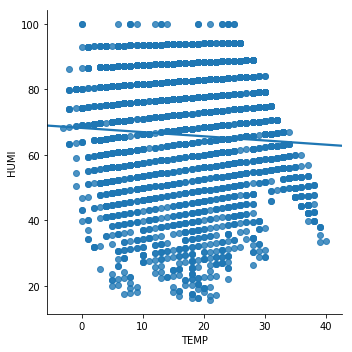

In [42]:
sns.lmplot(x='TEMP', y='HUMI', data=shanghai, ci=None)

In [43]:
shanghai.std()

No            7476.246353
year             0.816873
month            3.520245
day              1.400510
hour             6.656641
season           1.159499
PM_Jingan       47.436939
PM_US Post      42.622516
PM_Xuhui        51.618570
DEWP             9.715268
HUMI            18.523795
PRES             8.943042
TEMP             9.191598
Iws             71.844689
Iprec            3.282441
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119b0eac8>,
      dtype=object)

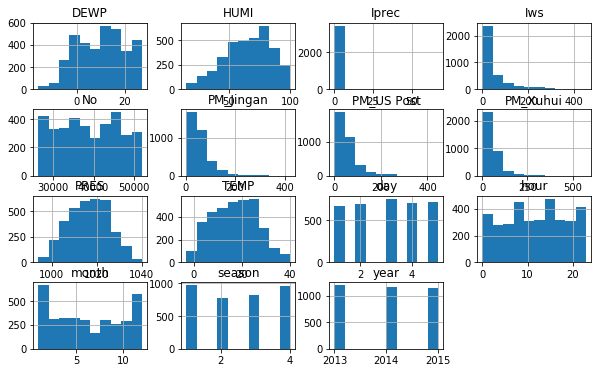

In [44]:
shanghai.hist()

# Is the relationship significant?
Yes. 
# Are any model assumptions violated?
NO, no very noticable violated.
# Cross-validate the model. How well did it do?
the model is not over fitting in test of other dataset. 